In [8]:
import pydriller as pyd
from datetime import datetime

In [4]:
#period to collect data
dt1 = datetime(2019, 11, 1)
dt2 = datetime(2020, 11, 1)

#path of 5 python repositories
path = ["https://github.com/django/django.git","https://github.com/pandas-dev/pandas.git",
        "https://github.com/numpy/numpy","https://github.com/home-assistant/home-assistant.git",
        "https://github.com/donnemartin/system-design-primer.git"]

In [5]:
#collecting a version of a source file before and after applying a commit
tf_source = pd.DataFrame(columns=['commit_ID', 'before_Commit', 'after_Commit'])
for commit in pyd.RepositoryMining(path_to_repo=path, since=dt1, to=dt2).traverse_commits():
    for modified_file in commit.modifications:
        if modified_file.filename.endswith(".py"):
            tf_source = tf_source.append({'commit_ID': commit.hash,'before_Commit': modified_file.source_code_before,
                                          'after_Commit': modified_file.source_code}, ignore_index=True)

In [28]:
py_st_lib =  pd.read_csv('...\py_st_lib.csv')

In [10]:
import ast
import tokenize

In [29]:
class FuncParser(ast.NodeVisitor):
    def visit_Import(self, node): 
        tempImpo = node.names
        if(tempImpo != None):
            listImpo = tempImpo[0]
            Impo = listImpo.name
            if (Impo in api_name):
                file_contents.append(Impo)
                ast.NodeVisitor.generic_visit(self, node)
            else:
                ast.NodeVisitor.generic_visit(self, node)
    def visit_ImportFrom(self, node):
        module=node.module
        if(module in api_name):
            file_contents.append(module)
        else:
            ast.NodeVisitor.generic_visit(self, node)
    def generic_visit(self, node):
        ast.NodeVisitor.generic_visit(self, node)

#dump of a sample code

In [38]:
with tokenize.open("sample_1.py") as sf:  # need the tokenize.open for source files and not a string
    try:
        source_file = sf.read()
        ast_commit = ast.parse(source_file)
    except ValueError:
        error+=1

In [40]:
bf_obj = FuncParser()
bf_tree = ast.parse(ast_commit)
print(ast.dump(ast_commit))

Module(body=[Import(names=[alias(name='tokenize', asname='tz')]), Import(names=[alias(name='assistant', asname='ass')])])


In [166]:
bf_obj = FuncParser()
bf_tree = ast.parse(ast_commit)
file_contents = []
bf_obj.visit(bf_tree)

In [167]:
file_contents

['tokenize']

In [169]:
tf_source=Heap_Dev[['commit_ID','Commit_before', 'Commit_after']]

In [170]:
tf_source.head()

,commit_ID,Commit_before,Commit_after
0,a69742181f20f02b9a86ff1a89314efe62cdd21f,import os\nfrom distutils.version import Loose...,import os\nfrom distutils.version import Loose...
1,a69742181f20f02b9a86ff1a89314efe62cdd21f,"from datetime import datetime, timedelta\nfrom...","from datetime import datetime, timedelta\nfrom..."
2,a69742181f20f02b9a86ff1a89314efe62cdd21f,# -*- coding: utf-8 -*-\nfrom datetime import ...,# -*- coding: utf-8 -*-\nfrom datetime import ...
3,04beec77e5a713dd90ba31dcf7ad43fd64ac55bb,"""""""\nBase and utility classes for tseries type...","""""""\nBase and utility classes for tseries type..."
4,04beec77e5a713dd90ba31dcf7ad43fd64ac55bb,# pylint: disable=E1101\nfrom __future__ impor...,# pylint: disable=E1101\nfrom __future__ impor...


In [2]:
import pandas as pd

In [78]:
i=0
error=0
py_lib = {}

for row in tf_source.iterrows():
    if tf_source['Commit_before'][i] is not None:
        try:
            text_before=str(tf_source['Commit_before'][i])
    
      
            bf_obj = FuncParser()
            bf_tree = ast.parse(text_before)
            file_contents = []
            bf_obj.visit(bf_tree)
            dtobj_before = pd.DataFrame(file_contents, columns=['token'])
            tokens_before =pd.DataFrame(dtobj_before['token'].value_counts())
            
        except:
            error +=1
            
    else:
        file_contents = []
        dtobj_before = pd.DataFrame(file_contents, columns=['token'])
        tokens_before =pd.DataFrame(dtobj_before['token'].value_counts())
                
    if tf_source['Commit_after'][i] is not None:
        try:
            text_after=str(tf_source['Commit_after'][i])
        
            
            aft_obj = FuncParser()
            aft_tree = ast.parse(text_after)
            file_contents = []
            aft_obj.visit(aft_tree)
            dtobj_after = pd.DataFrame(file_contents, columns=['token'])
            tokens_after =pd.DataFrame(dtobj_after['token'].value_counts())
            
        except:
            error +=1
                
                
    else:
        file_contents = []
        dtobj_after = pd.DataFrame(file_contents, columns=['token'])
        tokens_after =pd.DataFrame(dtobj_after['token'].value_counts())
                  
    
    #calculating the difference
    diff = tokens_after.subtract(tokens_before)
    diff_token = diff[(diff.select_dtypes(include=['number']) != 0).any(1)]
    diff_token=diff_token.fillna(0)
    diff_token= diff_token.abs()
    diff_token = diff_token.reset_index()
    
    j=0       
    for j in range(0,len(diff_token)):
        word = diff_token['index'][j].lower()
        if word in py_lib:
            py_lib[word]+=diff_token['token'][j]
        else:
            py_lib[word]=1
        j+=1    
  
    i+=1

In [141]:
from operator import itemgetter

In [163]:
d=sorted(py_lib.items(), key=itemgetter(1),reverse=True)[:10]

In [164]:
d

[('warnings', 96.0),
 ('sys', 73.0),
 ('datetime', 28.0),
 ('test', 27.0),
 ('os', 22.0),
 ('collections', 18.0),
 ('io', 16.0),
 ('gc', 10.0),
 ('functools', 9.0),
 ('threading', 7.0)]

In [121]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

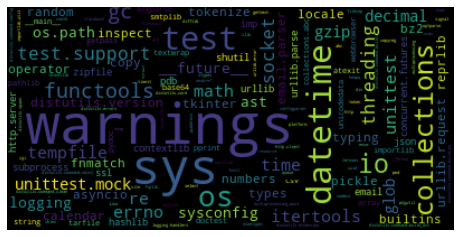

In [165]:
wordcloud = WordCloud(background_color='black',max_font_size = 50)
wordcloud.generate_from_frequencies(frequencies=py_lib)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('py_lib_wordcloud.jpg')
plt.show()